In [78]:
import torch
# Download an example image from the pytorch website
import urllib
from PIL import Image as Image 
from torchvision import transforms
from IPython.display import Image as show_img
import numpy as np
import os
import string
import re

In [94]:
def pre_process(lista):
    # remove directories
    lista = [item[105:] for item in lista]
    
    # remove digits
    lista = [re.sub(r'\b\d+\b', '', item) for item in lista]

    # remove hiffens 
    lista = [re.sub(r'\b-\b', ' ', item) for item in lista]

    # remove punctuation
    lista = [item.strip(string.punctuation) for item in lista]
    
    return lista

In [99]:
directory = "C:/Users/Asus/Documents/IST/MECD 0101/AEP/Projeto/Implementação/Computer Vision/256_ObjectCategories"
os.walk(directory)
lista = [x[0] for x in os.walk(directory)]
lista = pre_process(lista)
df = pd.read_csv('labels.csv',index_col = 'id')

lista_csv = [df['label'][i] for i in range(len(df))]
common_words = [item for item in lista if item in lista_csv]
print("# Existant classes: {}".format(len(common_words)))
common_words

# Existant classes: 32


['cannon',
 'canoe',
 'centipede',
 'coffee mug',
 'conch',
 'electric guitar',
 'football helmet',
 'golf ball',
 'goose',
 'harp',
 'hourglass',
 'hummingbird',
 'llama',
 'mushroom',
 'photocopier',
 'rifle',
 'school bus',
 'scorpion',
 'screwdriver',
 'snail',
 'snowmobile',
 'soccer ball',
 'syringe',
 'teapot',
 'tennis ball',
 'toaster',
 'triceratops',
 'trilobite',
 'tripod',
 'umbrella',
 'wine bottle',
 'zebra']

In [2]:
model = torch.hub.load('pytorch/vision:v0.4.2', 'mobilenet_v2', pretrained=True)
model.eval()

Using cache found in C:\Users\Asus/.cache\torch\hub\pytorch_vision_v0.4.2


MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

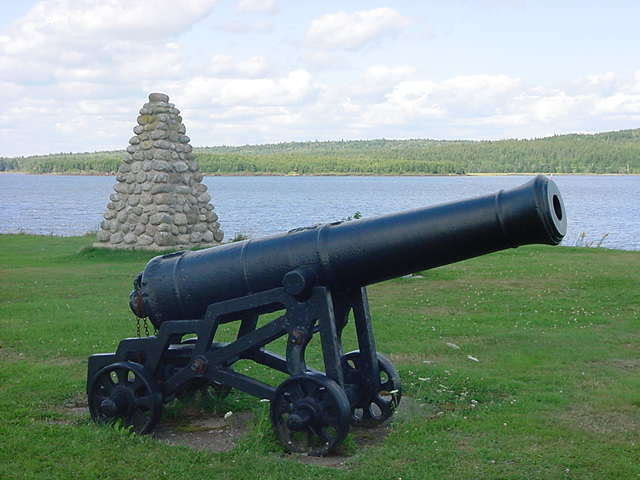

In [103]:
# Download an example image from the pytorch website

#url, filename = ("https://github.com/pytorch/hub/raw/master/dog.jpg", "dog.jpg")
#try: urllib.URLopener().retrieve(url, filename)
#except: urllib.request.urlretrieve(url, filename)
filename = "C:/Users/Asus/Documents/IST/MECD 0101/AEP/Projeto/Implementação/Computer Vision/electric guitar.jpg"
input_image = Image.open(filename)

#just for printing the image:
img_big = show_img(filename=filename,retina=True)
show_img(img_big.data,width=img_big.width/2)

In [4]:
def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224)
    ])    

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])     
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])    

    return transf    

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

input_tensor = preprocess_transform(pill_transf(input_image))
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

In [5]:
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
print(torch.nn.functional.softmax(output[0], dim=0))


tensor([-5.0051e+00, -2.4589e+00,  1.4531e+00, -3.2337e+00, -1.0986e+00,
         6.4309e-01, -1.9105e+00,  1.7372e+00,  4.0969e-01, -6.8179e+00,
        -8.5926e-01, -4.2975e+00, -2.4505e+00, -3.9180e+00, -6.7707e+00,
         1.6363e+00, -9.8414e-01, -8.8688e-01, -4.4755e+00, -7.3409e-01,
        -6.9085e+00, -5.2866e-01, -4.9957e+00, -1.0123e+00, -2.8906e+00,
         9.6829e-02, -2.3392e+00,  1.4642e+00,  1.5428e+00, -3.7248e+00,
        -6.6998e+00, -5.3106e+00, -3.3837e+00,  5.8561e-01,  9.8284e-01,
        -1.4183e+00,  7.0053e-01, -7.1449e-01,  6.6648e-01, -3.7507e+00,
        -5.7918e+00, -2.3977e+00, -4.5792e+00, -3.0796e+00,  9.1564e-01,
         5.6399e-01, -4.9310e+00, -2.7391e+00, -6.6584e+00, -3.7667e+00,
         7.9274e-01,  4.1902e+00, -3.1156e+00, -1.5468e+00,  6.6363e-01,
        -5.1165e+00,  9.8677e-01, -3.5336e+00, -2.6728e+00, -4.0529e+00,
         2.6198e-01,  7.1250e-01, -1.8584e+00, -1.1055e+00, -5.0069e+00,
        -1.9589e+00, -1.7976e-01, -1.6385e+00,  8.6

        -3.6045e+00, -3.0848e+00, -1.8249e+00,  7.6570e-01,  1.6237e+00])
tensor([4.0020e-14, 5.1060e-13, 2.5530e-11, 2.3530e-13, 1.9901e-12, 1.1357e-11,
        8.8359e-13, 3.3920e-11, 8.9931e-12, 6.5311e-15, 2.5282e-12, 8.1211e-14,
        5.1494e-13, 1.1869e-13, 6.8469e-15, 3.0664e-11, 2.2314e-12, 2.4593e-12,
        6.7965e-14, 2.8653e-12, 5.9655e-15, 3.5188e-12, 4.0401e-14, 2.1694e-12,
        3.3161e-13, 6.5771e-12, 5.7552e-13, 2.5816e-11, 2.7928e-11, 1.4398e-13,
        7.3505e-15, 2.9486e-14, 2.0251e-13, 1.0723e-11, 1.5952e-11, 1.4456e-12,
        1.2029e-11, 2.9220e-12, 1.1626e-11, 1.4031e-13, 1.8224e-14, 5.4285e-13,
        6.1270e-14, 2.7448e-13, 1.4916e-11, 1.0494e-11, 4.3102e-14, 3.8583e-13,
        7.6608e-15, 1.3807e-13, 1.3191e-11, 3.9424e-10, 2.6478e-13, 1.2712e-12,
        1.1593e-11, 3.5802e-14, 1.6015e-11, 1.7433e-13, 4.1227e-13, 1.0372e-13,
        7.7582e-12, 1.2174e-11, 9.3091e-13, 1.9765e-12, 3.9950e-14, 8.4184e-13,
        4.9879e-12, 1.1599e-12, 1.4207e-11, 1.

        2.7308e-13, 9.6257e-13, 1.2839e-11, 3.0280e-11])


In [6]:
import pandas as pd
predicted = torch.nn.functional.softmax(output[0], dim=0).argmax()
pd.read_csv('labels.csv',index_col = 'id').loc[int(predicted)+1].label

'electric fan, blower'

In [7]:
def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)
    #batch =preprocess_transform(images).unsqueeze(0)
    logits = model(batch)
    probs = torch.nn.functional.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

In [8]:
from lime import lime_image

In [47]:

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pill_transf(input_image)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000) # number of images that will be sent to classification function

NameError: name 'lime_image' is not defined

In [48]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

ImportError: cannot import name 'img_as_float32'

In [49]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

NameError: name 'explanation' is not defined

In [26]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)